In [93]:
import requests
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
import json

warnings.filterwarnings('ignore', message='Converting to PeriodArray/Index representation will drop timezone information.')



#dfStargazers = pd.read_csv("../inputs/huggingface-transformers.csv")
f = "../outputs/data"
dirs = os.listdir(f)

ideas:
- knn on readme to group the data and then see if there is a correlation between that and the graphs


In [26]:
np.any(df.forks<1000)

False

In [3]:
dfStargazers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   login                40000 non-null  object 
 1   id                   40000 non-null  int64  
 2   node_id              40000 non-null  object 
 3   avatar_url           40000 non-null  object 
 4   gravatar_id          0 non-null      float64
 5   url                  40000 non-null  object 
 6   html_url             40000 non-null  object 
 7   followers_url        40000 non-null  object 
 8   following_url        40000 non-null  object 
 9   gists_url            40000 non-null  object 
 10  starred_url          40000 non-null  object 
 11  subscriptions_url    40000 non-null  object 
 12  organizations_url    40000 non-null  object 
 13  repos_url            40000 non-null  object 
 14  events_url           40000 non-null  object 
 15  received_events_url  40000 non-null 

In [52]:
dirs.index("huggingface*transformers")

646

In [210]:
# def exponential(x, a, b, c, d):
#     return a * x + b * x**2 + c *x**3 + d
def exponential(x, a, b, d):
    return a * x + b * x**2 + d

In [211]:
class EDA():
    def __init__(self):
        self.outputDir = "../outputs/data"
        self.keywords = [
            "nlp",
            "natural language processing",
            "ai",
            "chat-gpt"
        ]

    def parseReadMe(self, path):
        with open(f"{path}/README.md", "r") as file:
            readme = file.read().lower()
            keyword_counts = {keyword:readme.count(keyword) for keyword in self.keywords}
        return keyword_counts
    
    def getCumData(self, df):
        df["year-mo"] = df["created_at"].dt.to_period('M')
        data = df.groupby("year-mo")["id"].count().reset_index()
        data["year-mo"] = data["year-mo"].dt.to_timestamp()
        data["count"] = data.id.cumsum()
        return data
    
    def graphForksOverTime(self, df):
        #data = self.getCumData(df)
        sns.lineplot(data=df, x="year-mo", y="count")
        plt.show()
    
    def readGithubInfo(self,path):
        with open(f"{path}/info.json", 'r') as f:
            data = json.load(f)
        return data
    
    def countForksAfterDate(self, df):
        #df["created_at"] = df["created_at"].dt.to_timestamp()
        cutoff_date = pd.Timestamp("2020-06-11", tz='UTC')
        forks_after_date = df[df["created_at"] > cutoff_date].shape[0]
        total_forks = df.shape[0]
        percentage_increase = (forks_after_date / total_forks) * 100
        return forks_after_date, percentage_increase
    
    
    def getForksData(self,path):
        df = pd.read_csv(path+"/forks.csv")
        df = df.sort_values("created_at")
        df['created_at'] = pd.to_datetime(df['created_at'])
        return df
    
    def getCurveFit(self, df):
        # Define the x and y data
        x = df.index.values
        y = df['count']
        print(y)
        # Perform linear curve fit
        linear_coefficients = np.polyfit(x, y, 1)
        linear_y_fit = np.polyval(linear_coefficients, x)

        

        # Calculate R-squared for linear fit
        linear_residuals = y - linear_y_fit
        linear_ss_res = np.sum(linear_residuals**2)
        linear_ss_tot = np.sum((y - np.mean(y))**2)
        linear_r_squared = 1 - (linear_ss_res / linear_ss_tot)
        print('Linear R-squared:', linear_r_squared)

        try:
            # Perform exponential curve fit
            exp_coefficients, _ = curve_fit(exponential, x, y)
            exp_y_fit = exponential(x, *exp_coefficients)
            print(exp_coefficients)
            # Calculate R-squared for exponential fit
            exp_residuals = y - exp_y_fit
            exp_ss_res = np.sum(exp_residuals**2)
            exp_ss_tot = np.sum((y - np.mean(y))**2)
            exp_r_squared = 1 - (exp_ss_res / exp_ss_tot)
            print('Exponential R-squared:', exp_r_squared)
        except (ValueError, RuntimeError):
            pass
        
            
        

    
    def goThroughDirectories(self):
        self.DATA = []
        for i in range(646,656):
            repo = "/".join(dirs[i].split("*"))
            path = self.outputDir+"/"+dirs[i]
            forks = self.getForksData(path)
            
            forksCum = self.getCumData(forks)
            info = self.readGithubInfo(path)
            info["data"]["topics"]
            
            keyword_counts = self.parseReadMe(path)
            fork_counts = self.countForksAfterDate(forks)
            self.getCurveFit(forksCum)
            
            data = {
                "Repo": repo,
                "index": i,
                "topics": info["data"]["topics"],
                "readme.md-keyword_counts": keyword_counts,
                "forks count post june 2020": fork_counts,
                "forks":forksCum
            }
            self.DATA.append(data)
            self.graphForksOverTime(forksCum)
#             print(f"Keyword counts in {repo}/README.md: {keyword_counts}")
#             print(f"Forks increase in {repo}/forks.csv: {fork_counts}")



0       212
1       324
2       465
3       688
4       889
5      1075
6      1292
7      1509
8      1994
9      2310
10     2708
11     3073
12     3439
13     3738
14     4009
15     4274
16     4754
17     5152
18     5642
19     6029
20     6449
21     6808
22     7162
23     7578
24     7991
25     8343
26     8637
27     8895
28     9235
29     9597
30     9859
31    10155
32    10508
33    10812
34    11119
35    11434
36    11757
37    12097
38    12407
39    12686
40    13133
41    13548
42    13918
43    14283
44    14618
45    14950
46    15285
47    15766
48    16145
49    16498
50    16918
51    17466
52    18178
Name: count, dtype: int64
Linear R-squared: 0.998030857642197
[ 322.58163812    0.47116861 -366.62187917]
Exponential R-squared: 0.9983747900369421


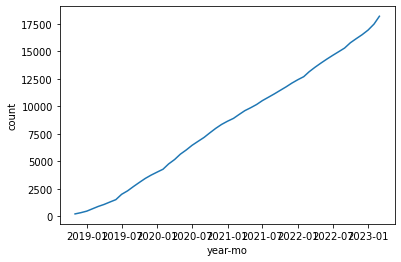

0       85
1      162
2      247
3      315
4      401
5      503
6      619
7      698
8      816
9      928
10    1058
11    1207
12    1343
13    1464
14    1598
15    1746
16    1964
17    2130
18    2307
19    2451
20    2598
21    2760
22    2915
23    3074
24    3220
25    3373
26    3506
27    3638
28    3817
29    3938
30    4081
Name: count, dtype: int64
Linear R-squared: 0.9921046971154126
[100.40777253   1.32125973  -7.10080645]
Exponential R-squared: 0.9977386844530535


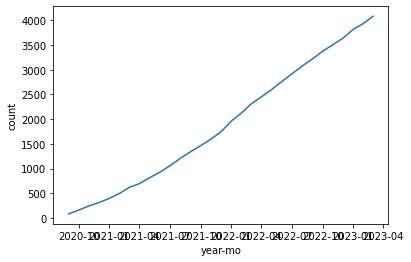

0        7
1       38
2       92
3      154
4      211
5      279
6      357
7      429
8      501
9      582
10     660
11     739
12     824
13     912
14     996
15    1086
16    1172
17    1239
18    1302
19    1357
20    1423
21    1512
22    1584
23    1640
24    1711
25    1777
26    1844
27    1929
28    1996
29    2054
30    2107
31    2151
32    2194
33    2224
34    2268
35    2307
36    2349
37    2364
38    2367
Name: count, dtype: int64
Linear R-squared: 0.9909107616051865
[  88.01708878   -0.52575868 -114.95534709]
Exponential R-squared: 0.9968948138516146


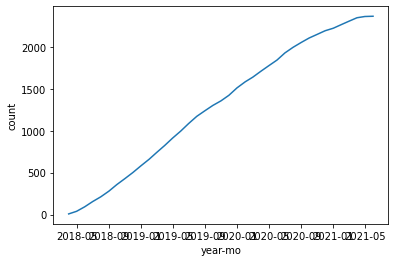

0        3
1      108
2      178
3      255
4      316
5      375
6      426
7      480
8      549
9      590
10     637
11     682
12     726
13     764
14     798
15     838
16     868
17     892
18     915
19     944
20     962
21     988
22    1005
23    1033
24    1064
25    1097
26    1112
27    1143
28    1167
29    1190
30    1236
31    1270
32    1302
Name: count, dtype: int64
Linear R-squared: 0.9608911552632597
[61.65275296 -0.78835266 72.09396486]
Exponential R-squared: 0.9934480869675024


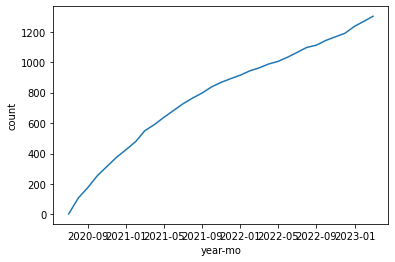

0        1
1        6
2        8
3       15
4       26
      ... 
69    1252
70    1261
71    1269
72    1279
73    1282
Name: count, Length: 74, dtype: int64
Linear R-squared: 0.9830799290964776
[  27.41832784   -0.11054954 -108.56463539]
Exponential R-squared: 0.9947877439845962


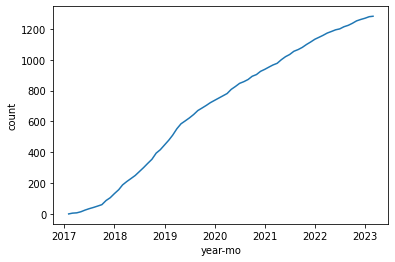

0        43
1        77
2       104
3       129
4       167
      ...  
84    14537
85    14573
86    14593
87    14630
88    14659
Name: count, Length: 89, dtype: int64
Linear R-squared: 0.9349793862337399
[ 3.68779145e+02 -1.97589415e+00 -2.13087240e+03]
Exponential R-squared: 0.985698662274923


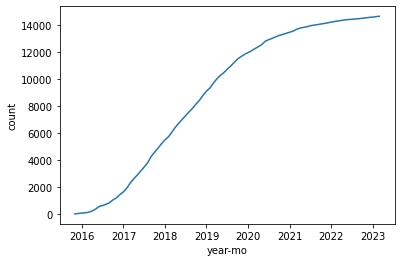

0      182
1      318
2      332
3      341
4      389
      ... 
66    1321
67    1330
68    1333
69    1340
70    1353
Name: count, Length: 71, dtype: int64
Linear R-squared: 0.8826661269014295
[ 3.21730083e+01 -2.61355806e-01  3.13903178e+02]
Exponential R-squared: 0.9877851486077507


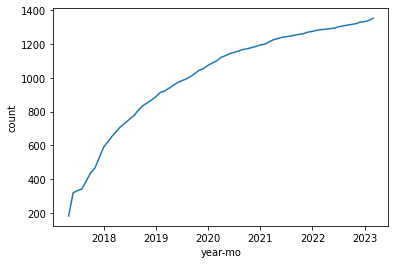

0         4
1         5
2        11
3        12
4        17
       ... 
157    2369
158    2376
159    2390
160    2394
161    2395
Name: count, Length: 162, dtype: int64
Linear R-squared: 0.985212377335149
[ 1.88259800e+01 -7.88907304e-03 -2.44837700e+02]
Exponential R-squared: 0.9855604029381488


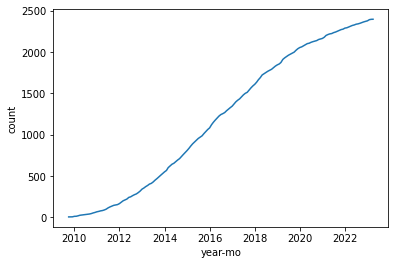

0       23
1       64
2      128
3      228
4      308
5      386
6      480
7      551
8      633
9      697
10     757
11     812
12     888
13     963
14    1026
15    1083
16    1160
17    1214
18    1277
19    1342
20    1415
21    1469
22    1525
23    1584
24    1667
25    1739
26    1814
27    1879
28    1938
29    1998
30    2072
31    2164
32    2237
33    2298
34    2369
35    2465
36    2577
37    2688
38    2793
Name: count, dtype: int64
Linear R-squared: 0.997837365224329
[66.0060618   0.09157817 52.78930582]
Exponential R-squared: 0.99801264952063


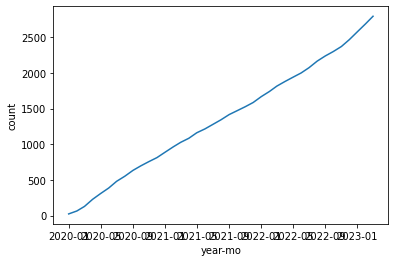

0        3
1        4
2        5
3        7
4      171
      ... 
82    1302
83    1305
84    1309
85    1328
86    1333
Name: count, Length: 87, dtype: int64
Linear R-squared: 0.9404846617345207
[28.10463692 -0.15728705 46.08328241]
Exponential R-squared: 0.9957003335669209


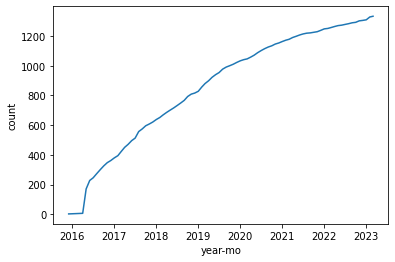

In [212]:
eda = EDA()
eda.goThroughDirectories()

In [143]:
df = eda.DATA[0]["forks"]

In [107]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load data
# data = pd.read_csv('readme_data.csv')

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(["Hi my name is julia"])
print(X)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Print cluster centers and top terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print(" %s" % terms[j])
    print()


  (0, 1)	0.7071067811865475
  (0, 0)	0.7071067811865475


ValueError: n_samples=1 should be >= n_clusters=3.

In [108]:
dfForks['created_at'] = pd.to_datetime(dfForks['created_at'])
dfForks["year-mo"] = dfForks["created_at"].dt.to_period('M')
data = dfForks.groupby("year-mo")["id"].count().reset_index()
data["year-mo"] = data["year-mo"].dt.to_timestamp()
data["count"] = data.id.cumsum()
sns.lineplot(data=data, x="year-mo", y="count")
plt.show()

NameError: name 'dfForks' is not defined

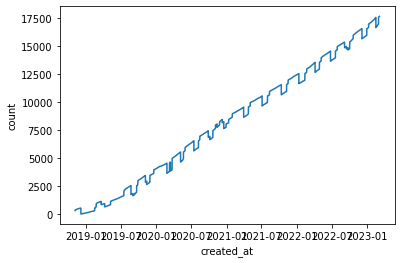

In [38]:
dfForks['created_at'] = pd.to_datetime(dfForks['created_at'])
dfForks["count"] = len(dfForks) - np.array(dfForks.index)
sns.lineplot(data=dfForks, x="created_at", y="count")
plt.show()

In [149]:
df = df.reset_index().rename(columns={"index":"x","count":"y"})

In [155]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Define the function to fit to the data
def custom_curve(x, a, b, c):
    return a * np.sin(b * x) + c



# Fit the function to the data
popt, pcov = curve_fit(custom_curve, df['x'], df['y'])

# Generate the curve using the fitted parameters
custom_fit = custom_curve(df['x'], *popt)

# Compare the fit to the data
r2 = 1 - (np.sum((df['y'] - custom_fit)**2) / np.sum((df['y'] - np.mean(df['y']))**2))

print('R-squared:', r2)




R-squared: 0.0024328728686453527


In [152]:
pcov

array([[ 1.13770112e+06, -1.70665661e+00,  5.17466624e+03],
       [-1.70665661e+00,  8.94390908e-03, -5.97248191e-02],
       [ 5.17466624e+03, -5.97248191e-02,  5.63543673e+05]])

In [153]:
custom_fit

0     8447.573326
1     8084.461939
2     8608.924319
3     8738.987313
4     8156.730565
5     8285.397281
6     8810.480106
7     8448.489298
8     8084.259528
9     8608.098290
10    8739.556775
11    8157.303550
12    8284.573209
13    8810.273304
14    8449.405265
15    8084.059315
16    8607.271289
17    8740.124472
18    8157.878291
19    8283.750123
20    8810.064307
21    8450.321220
22    8083.861301
23    8606.443323
24    8740.690398
25    8158.454784
26    8282.928028
27    8809.853117
28    8451.237158
29    8083.665487
30    8605.614396
31    8741.254551
32    8159.033026
33    8282.106929
34    8809.639736
35    8452.153075
36    8083.471875
37    8604.784512
38    8741.816928
39    8159.613013
40    8281.286831
41    8809.424165
42    8453.068963
43    8083.280465
44    8603.953678
45    8742.377525
46    8160.194742
47    8280.467739
48    8809.206405
49    8453.984819
50    8083.091258
51    8603.121898
52    8742.936339
Name: x, dtype: float64

In [154]:
df

,x,year-mo,id,y
0,0,2018-11-01,212,212
1,1,2018-12-01,112,324
2,2,2019-01-01,141,465
3,3,2019-02-01,223,688
4,4,2019-03-01,201,889
5,5,2019-04-01,186,1075
6,6,2019-05-01,217,1292
7,7,2019-06-01,217,1509
8,8,2019-07-01,485,1994
9,9,2019-08-01,316,2310


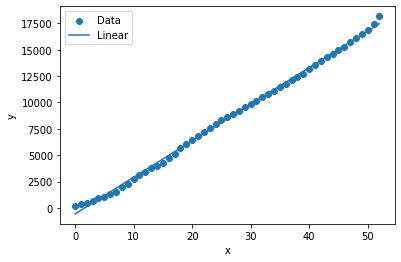

In [159]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



# Define the functions for the linear and exponential curves
def linear(x, a, b):
    return a * x + b

def exponential(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the linear curve to the data
popt_linear, pcov_linear = curve_fit(linear, df['x'], df['y'])
a_linear, b_linear = popt_linear

# Fit the exponential curve to the data
popt_exponential, pcov_exponential = curve_fit(exponential, df['x'], df['y'])
a_exponential, b_exponential, c_exponential = popt_exponential

# Create a scatter plot of the data
plt.scatter(df['x'], df['y'], label='Data')

# Plot the linear curve
plt.plot(df['x'], linear(df['x'], a_linear, b_linear), label='Linear')

# Plot the exponential curve
#plt.plot(df['x'], exponential(df['x'], a_exponential, b_exponential, c_exponential), label='Exponential')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Linear R-squared: 0.998030857642197
Exponential R-squared: -213307372.45354235
